In [1]:
from shapely.geometry import Point, LineString, Polygon

In [2]:
point1 = Point(2.2, 4.2)

In [3]:
point2 = Point(7.2, -25.1)

point3 = Point(9.26, -2.456)

point3D = Point(9.26, -2.456, 0.57)

In [4]:
point_type = type(point1)

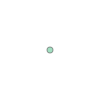

POINT (2.2 4.2)
POINT Z (9.26 -2.456 0.57)
<class 'shapely.geometry.point.Point'>


In [17]:
from shapely.geometry import Point, LineString, Polygon

point2 = Point(7.2, -25.1)

point_type = type(point2)

display(point2)

print(point1)

print(point3D)

print(type(point1))


In [16]:
from shapely.geometry import Point, LineString, Polygon

point2 = Point(7.2, -25.1)

point_type = type(point2)

print(point_type)

print(point1)

<class 'shapely.geometry.point.Point'>
POINT (2.2 4.2)


In [18]:
point_coords = point1.coords

# What is the type of this?
type(point_coords)

shapely.coords.CoordinateSequence

In [19]:
# Get x and y coordinates
xy = point_coords.xy

# Get only x coordinates of Point1
x = point1.x

# Whatabout y coordinate?
y = point1.y

In [20]:
print(xy)
print(x)
print(y)

(array('d', [2.2]), array('d', [4.2]))
2.2
4.2


In [23]:
point_dist = point2.distance(point3)
print(point_dist)

22.737509450245426


In [25]:
import pyproj

geod = pyproj.Geod(ellps='WGS84')

angle1,angle2,distance = geod.inv(point2.x, point2.y, point3.x, point3.y)

print ("{0:8.4f} for ellipsoid WGS84 in km".format(distance/1000))

2515.2909 for ellipsoid WGS84 in km


In [27]:
# Create a LineString from our Point objects
line = LineString([point1, point2, point3])

# It is also possible to use coordinate tuples having the same outcome
line2 = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

print(line), print(line2), type(line)


LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)
LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)


(None, None, shapely.geometry.linestring.LineString)

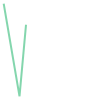

POINT (6.229961354035622 -11.89241115757239)
52.46106912939557
LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)


In [41]:
point_list=[point1, point2, point3]
new_line=LineString(point_list)
display(new_line)
l_length = line.length
l_centroid = line.centroid
print(l_centroid)
print(l_length)
print(new_line)

POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))
POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))
Geometry type as text: Polygon
Geometry how Python shows it: <class 'shapely.geometry.polygon.Polygon'>


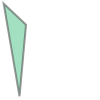

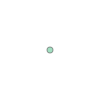

86.78900000000002

In [44]:
# Create a Polygon from the coordinates
poly = Polygon([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

# We can also use our previously created Point objects (same outcome)
# --> notice that Polygon object requires x,y coordinates as input
poly2 = Polygon([[p.x, p.y] for p in [point1, point2, point3]])

# Geometry type can be accessed as a String
poly_type = poly.geom_type

# Using the Python's type function gives the type in a different format
poly_type2 = type(poly)

# Let's see how our Polygon looks like
print(poly)
print(poly2)
print("Geometry type as text:", poly_type)
print("Geometry how Python shows it:", poly_type2)
display(poly)
display(poly.centroid)
display(poly.area)


In [78]:
point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)

p_list=[point1, point2, point3]
prep_list=[]
for po in p_list:
    prep_list.append
print(prep_list)

[]


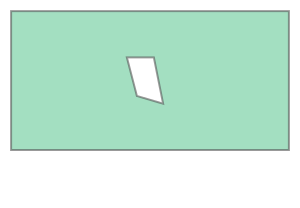

In [59]:
# Let's create a bounding box of the world and make a whole in it
# First we define our exterior
world_exterior = [(-180, 90), (-180, -90), (180, -90), (180, 90)]

# Let's create a single big hole where we leave ten decimal degrees at the boundaries of the world
# Notice: there could be multiple holes, thus we need to provide a list of holes
hole = [[(-130, 80), (-170, -30), (170, -80), (10, 80)]]
hole2 = [[(-30, 30), (-17, -20), (17, -30), (5, 30)]]

# World without a hole
world = Polygon(shell=world_exterior)

# Now we can construct our Polygon with the hole inside
world_has_a_hole = Polygon(shell=world_exterior, holes=hole2)
display(world_has_a_hole)

In [61]:
# Get the centroid of the Polygon
world_centroid = world.centroid
print(world_centroid)

# Get the area of the Polygon
world_area = world.area
print(world_area)
# Get the bounds of the Polygon (i.e. bounding box)
world_bbox = world.bounds
print(world_bbox)
# Get the exterior of the Polygon
world_ext = world.exterior
print(world_ext)
# Get the length of the exterior
world_ext_length = world_ext.length
print(world_ext_length)

POINT (-0 -0)
64800.0
(-180.0, -90.0, 180.0, 90.0)
LINEARRING (-180 90, -180 -90, 180 -90, 180 90, -180 90)
1080.0


In [69]:

import pandas as pd
# make sure you have the correct path to your working file, ideally in the same folder
df = pd.read_csv('global-city-population-estimates.csv', sep=';', encoding='latin1')

# this option tells pandas to print up to 20 columns, typically a the print function will cut the output for better visibility
# (depending on the size and dimension of the dataframe)
pd.set_option('max_columns',20)

print(df.head(5))

  Country or area Urban Agglomeration   Latitude   Longitude  Population_2015  \
0           Japan               Tokyo  35.689500  139.691710         38001018   
1           India               Delhi  28.666670   77.216670         25703168   
2           China            Shanghai  31.220000  121.460000         23740778   
3          Brazil           S?o Paulo -23.550000  -46.640000         21066245   
4           India     Mumbai (Bombay)  19.073975   72.880838         21042538   

   Unnamed: 5  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  


In [68]:
import pandas as pd

df = pd.read_csv('global-city-population-estimates.csv', sep=';', encoding='latin1')
print(df.head(5))



  Country or area Urban Agglomeration   Latitude   Longitude  Population_2015  \
0           Japan               Tokyo  35.689500  139.691710         38001018   
1           India               Delhi  28.666670   77.216670         25703168   
2           China            Shanghai  31.220000  121.460000         23740778   
3          Brazil           S?o Paulo -23.550000  -46.640000         21066245   
4           India     Mumbai (Bombay)  19.073975   72.880838         21042538   

   Unnamed: 5  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  


In [72]:
def make_point(row):
    return Point(row['Longitude'], row['Latitude'])

# Go through every row, and make a point out of its lat and lon, by **apply**ing the function from above (downwards row by row -> axis=1)
df['points'] = df.apply(make_point, axis=1)
print(df.head(5))

  Country or area Urban Agglomeration   Latitude   Longitude  Population_2015  \
0           Japan               Tokyo  35.689500  139.691710         38001018   
1           India               Delhi  28.666670   77.216670         25703168   
2           China            Shanghai  31.220000  121.460000         23740778   
3          Brazil           S?o Paulo -23.550000  -46.640000         21066245   
4           India     Mumbai (Bombay)  19.073975   72.880838         21042538   

   Unnamed: 5                              points  
0         NaN           POINT (139.69171 35.6895)  
1         NaN  POINT (77.21666999999999 28.66667)  
2         NaN                POINT (121.46 31.22)  
3         NaN               POINT (-46.64 -23.55)  
4         NaN         POINT (72.880838 19.073975)  


In [76]:
def make_point2(row):
    x_val=row['Longitude']
    y_val=row['Latitude']
    newpoint=Point(x_val, y_val) #Point is a inbuilt function to make point
    return newpoint

df['points2'] = df.apply(make_point2, axis=1)

print(df.head(5))


  Country or area Urban Agglomeration   Latitude   Longitude  Population_2015  \
0           Japan               Tokyo  35.689500  139.691710         38001018   
1           India               Delhi  28.666670   77.216670         25703168   
2           China            Shanghai  31.220000  121.460000         23740778   
3          Brazil           S?o Paulo -23.550000  -46.640000         21066245   
4           India     Mumbai (Bombay)  19.073975   72.880838         21042538   

   Unnamed: 5                              points  \
0         NaN           POINT (139.69171 35.6895)   
1         NaN  POINT (77.21666999999999 28.66667)   
2         NaN                POINT (121.46 31.22)   
3         NaN               POINT (-46.64 -23.55)   
4         NaN         POINT (72.880838 19.073975)   

                              points2  
0           POINT (139.69171 35.6895)  
1  POINT (77.21666999999999 28.66667)  
2                POINT (121.46 31.22)  
3               POINT (-46.64 -23.